### About this file.

This file contain the source code of the final project as indicated in the final_project file in the same folder.

### About the dataset.

This dataset contains information about customer of a telecom company, which includes demographics, service subscriptions, billing information, and churn status. It captures aspects like hether a customer has phone or internet services, their tenure with the company, usage of additional services like online security, and their chosen payment methods as features that would be learning to decide if a customer churned or not. This dataset is particularly useful in analyzing patterns and factors that contribute to customer churn. However, our focus would be on predictivity instead of interpretability, though this may be more useful for business purpose than our choice.

### Load the dataset.

In [1041]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support,roc_curve


In [1042]:
 matric_scores = {}
def evaluation_matric(y_test, y_pred):
    matric_scores["accuracy"] = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
    matric_scores["precision"] = precision
    matric_scores["recall"] = recall
    matric_scores["f1_score"] = f1_score

In [1226]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on a Telecom Company customer churn dataset'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    ax.set_xlabel("False Positive")
    ax.set_ylabel("True Positive")

In [1163]:
file_path = "/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/Telecom Customers Churn.csv"

In [1164]:
dataset = pd.read_csv(file_path)

### Data Exploration.

In [1165]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1166]:
# random samples of five rows to observe for better understanding of the data.
dataset.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4163,9253-VIFJQ,Male,0,Yes,No,65,Yes,Yes,DSL,Yes,...,Yes,No,No,No,One year,No,Credit card (automatic),67.05,4309.55,No
6724,7359-SSBJK,Female,1,No,No,64,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),70.20,4481,Yes
3710,3724-BSCVH,Male,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,242.4,No
1933,1964-SVLEA,Male,0,No,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,415.9,No
1221,3055-MJDSB,Male,0,No,No,9,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.60,190.1,No


In [1167]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1168]:
dataset.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

In [1169]:
#check for missing values.
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1170]:
print(f"Number of duplicated items: {dataset['customerID'].duplicated().sum()}")

Number of duplicated items: 0


In [1171]:
dataset.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Feature engineering.

In [1172]:
dataset.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [1173]:
# drop customerID columns since it carries no information that can contribute to model learning.
# drop total charges since we already have monthly charges
dataset.drop(["customerID", "TotalCharges"],inplace=True, axis=1)

In [1174]:
X = dataset.drop("Churn", axis=1)
y = dataset["Churn"]

In [1175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1176]:
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape:{X_test.shape}\ny_test shape: {y_test.shape}")

X_train shape: (4930, 18)
y_train shape: (4930,)
X_test shape:(2113, 18)
y_test shape: (2113,)


In [1177]:
cat_col = []
def get_cat_col(data):
    for col in data.columns:
        if len(data[col].value_counts()) == 2 or len(data[col].value_counts()) == 3 and data[col].dtypes == object:
                cat_col.append(col)


In [1178]:
get_cat_col(X_train)
cat_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']

In [1179]:
X_train.Contract.value_counts()

Contract
Month-to-month    2727
Two year          1192
One year          1011
Name: count, dtype: int64

In [1180]:
def transform_cat_col(data):
    if len(data.shape) == 1:
        data.replace({"No": 0, "Yes":1}, inplace=True)
    else:
        data[cat_col] = data[cat_col].replace({"Male":0,"Female":1,"No":0,"Yes":1, "No phone service": 2, "No internet service": 2
                                     ,"Month-to-month":0, "One year":1,"Two year":2})

In [1181]:
dataset_list = [X_train, X_test, y_train, y_test]
for data in dataset_list:
    transform_cat_col(data)

In [1182]:
X_test.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
580,1,0,1,1,12,1,0,0,2,2,2,2,2,2,0,0,Mailed check,19.00
400,1,0,0,0,32,1,0,0,2,2,2,2,2,2,1,0,Bank transfer (automatic),19.75
3035,1,1,1,0,25,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,69.30
2765,0,0,0,0,13,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.15
4536,0,0,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,69.35


In [1183]:
y_test

580     1
400     0
3035    0
2765    0
4536    1
       ..
4307    1
1768    0
1440    0
2274    1
3781    0
Name: Churn, Length: 2113, dtype: int64

In [1184]:
def normalize_cols(df, col_name_arr):
    for col in col_name_arr:
        df[col] = df[col].apply(lambda r: (r - df[col].min())/df[col].max())

In [1185]:
#X_train["tenure"] = X_train["tenure"].apply(lambda r: (r - X_train["tenure"].min())/X_train["tenure"].max())

In [1186]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
43,1,0,0,0,63,1,1,DSL,1,1,1,1,1,0,2,1,Credit card (automatic),79.85
1188,1,0,0,0,35,1,0,Fiber optic,0,0,1,1,1,1,1,1,Electronic check,99.25
3394,0,0,0,0,26,1,1,DSL,1,1,0,0,0,0,1,0,Electronic check,61.55
1831,1,1,1,0,22,1,1,DSL,1,1,0,1,0,0,0,1,Mailed check,63.55
5443,0,0,0,0,26,1,0,DSL,0,0,0,0,0,0,0,0,Electronic check,45.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,1,0,1,1,1,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,73.55
4135,1,0,1,1,36,1,1,DSL,1,1,1,1,1,1,2,1,Credit card (automatic),92.90
5973,0,0,0,0,64,1,1,Fiber optic,0,1,1,0,1,1,2,1,Bank transfer (automatic),104.40
5067,1,0,1,1,30,1,0,DSL,1,0,0,1,0,1,0,0,Bank transfer (automatic),66.30


In [1187]:
X_dataset = [X_train, X_test]
for data in X_dataset:
     normalize_col(data, ["tenure", "MonthlyCharges"])

In [1188]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
580,1,0,1,1,0.166667,1,0,0,2,2,2,2,2,2,0,0,Mailed check,0.006337
400,1,0,0,0,0.444444,1,0,0,2,2,2,2,2,2,1,0,Bank transfer (automatic),0.012674
3035,1,1,1,0,0.347222,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,0.431348
2765,0,0,0,0,0.180556,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,0.438530
4536,0,0,0,0,0.013889,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,0.431770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,1,1,0,0,0.513889,1,1,Fiber optic,0,0,0,0,1,1,0,1,Electronic check,0.661597
1768,1,0,0,0,0.875000,1,0,DSL,0,0,1,0,0,1,1,0,Credit card (automatic),0.340515
1440,0,0,1,1,0.111111,1,0,0,2,2,2,2,2,2,1,0,Credit card (automatic),0.013942
2274,0,0,1,1,0.319444,1,0,Fiber optic,1,0,0,1,1,1,0,1,Electronic check,0.689480


In [1189]:
X_train.InternetService.replace({0: "Satellite"}, inplace=True)
X_test.InternetService.replace({0: "Satelitte"}, inplace=True)

In [1190]:
X_train.PaymentMethod.value_counts()

PaymentMethod
Electronic check             1669
Mailed check                 1125
Bank transfer (automatic)    1076
Credit card (automatic)      1060
Name: count, dtype: int64

In [1191]:
X_train_encode = pd.get_dummies(X_train, dtype=float)
X_test_encode = pd.get_dummies(X_test, dtype=float)

In [1192]:
X_train_encode.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_Satellite',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [1193]:
X_test_encode.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_Satelitte',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [1194]:
train_X = X_train_encode.values
test_X = X_test_encode.values

### Models

#### 1. DecisionTreeClassifier

In [1195]:
model1 = LogisticRegressionCV()

In [1196]:
model1.fit(train_X, y_train)

LogisticRegressionCV()

In [1197]:
y_pred = model1.predict(test_X)
y_pred_prob = model1.predict_proba(test_X)

In [1198]:
log_dic_pred = {"Actual values": y_test, "Predicted values LogisticRegression": y_pred}
df_predict = pd.DataFrame(log_dic_pred)

In [1199]:
df_predict.sample(10)

,Actual values,Predicted values LogisticRegression
4543,0,0
379,0,0
833,0,0
6037,0,0
2134,0,0
226,0,0
3809,0,0
3005,0,0
6237,1,1
2575,0,0


In [1200]:
model1.predict_proba(test_X)

array([[0.8947385 , 0.1052615 ],
       [0.96084373, 0.03915627],
       [0.45164907, 0.54835093],
       ...,
       [0.93790328, 0.06209672],
       [0.60748014, 0.39251986],
       [0.95813018, 0.04186982]])

In [1201]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

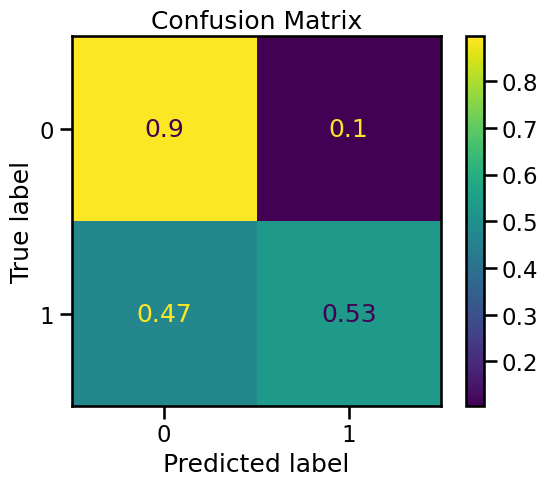

In [1238]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model1.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [1203]:
evaluation_matric(y_test, y_pred)

In [1204]:
pd.DataFrame(matric_scores)

,accuracy,precision,recall,f1_score
0,0.803124,0.849340,0.895570,0.871842
1,0.803124,0.630872,0.529081,0.575510


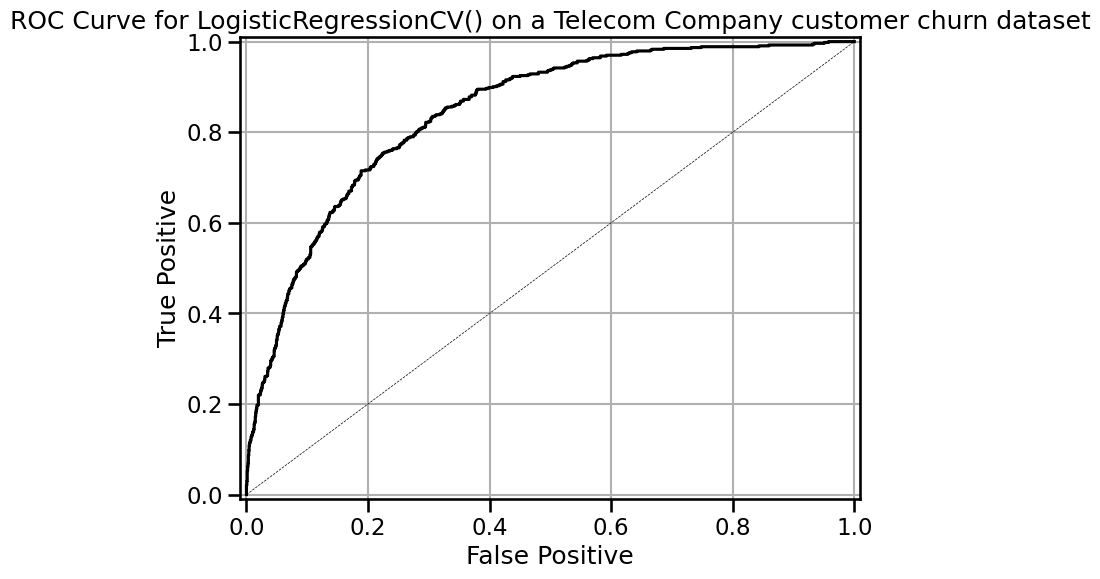

In [1208]:
plot_roc(y_test, y_pred_prob[:, 1],model1)

### model2

In [1209]:
model2 = MLPClassifier()

In [1210]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}
param_search = RandomizedSearchCV(estimator=model2,param_distributions=parameters, cv=5)

In [1211]:
param_search.fit(train_X, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'alpha': [0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [50, 100, 200],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 0.1],
                                        'max_iter': [200, 500, 800]})

In [1215]:
best_model = param_search.best_estimator_

In [1216]:
best_model

MLPClassifier(alpha=0.01, hidden_layer_sizes=200, learning_rate_init=0.0001)

In [1217]:
y_pred1 = best_model.predict(test_X)
y_pred1_prob = best_model.predict_proba(test_X)
y_pred1_prob

array([[0.8556745 , 0.1443255 ],
       [0.96509028, 0.03490972],
       [0.47871339, 0.52128661],
       ...,
       [0.95702782, 0.04297218],
       [0.61865042, 0.38134958],
       [0.96769808, 0.03230192]])

In [1231]:
mult_dic_pred = {"Actual values": y_test, "Predicted values multi-layer classifier": y_pred1}
df_pred1 = pd.DataFrame(mult_dic_pred)

In [1232]:
df_pred1.sample(10)

,Actual values,Predicted values multi-layer classifier
3136,1,1
2591,0,0
5467,0,0
5790,0,0
1367,0,0
4078,1,0
2741,1,1
3297,0,0
1466,0,0
5220,0,0


In [1235]:
cm1 = confusion_matrix(y_test, y_pred1, normalize='true')

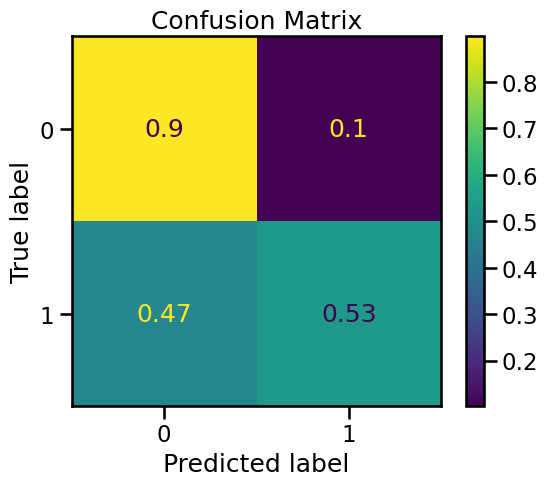

In [1239]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [1237]:
evaluation_matric(y_test, y_pred1)

In [1222]:
pd.DataFrame(matric_scores)

,accuracy,precision,recall,f1_score
0,0.80549,0.850210,0.898101,0.873500
1,0.80549,0.637387,0.530957,0.579324


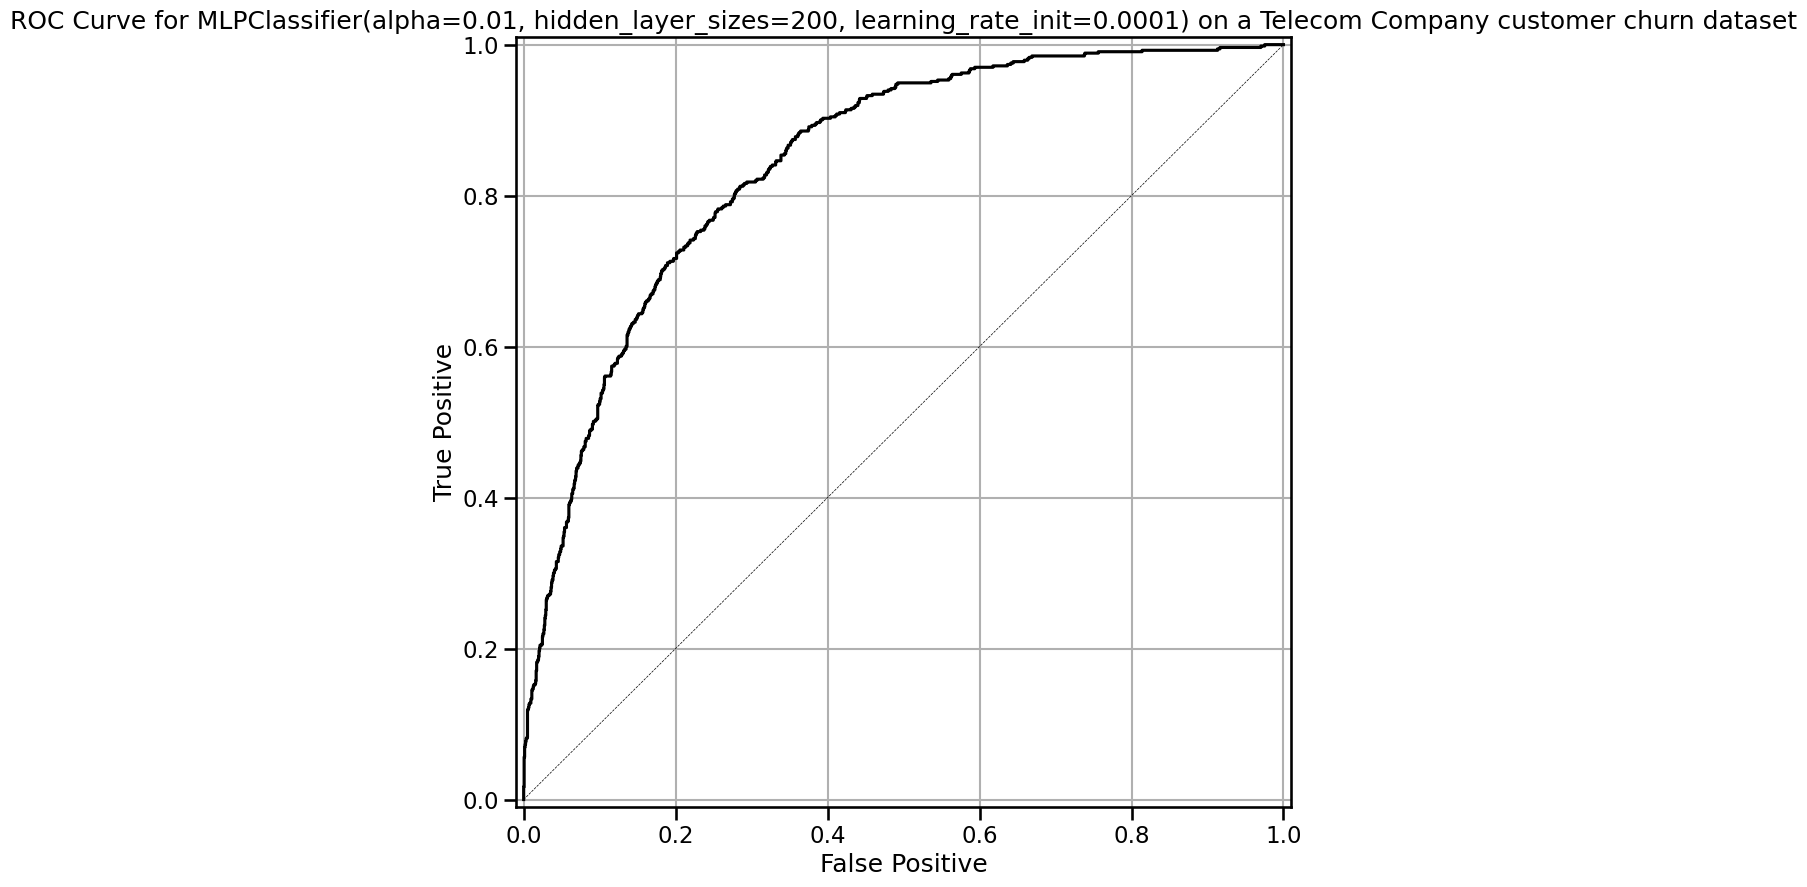

In [1227]:
plot_roc(y_test, y_pred1_prob[:, 1],best_model)

### Model3.